<a href="https://colab.research.google.com/github/xkabot/ForecastingMethods/blob/main/autoregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

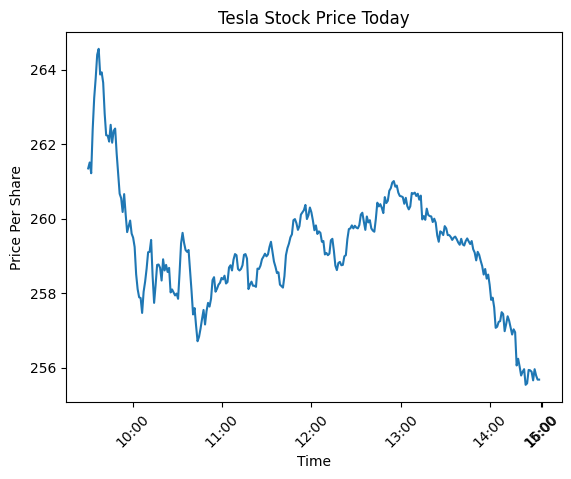

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator

# Fetch Tesla stock price data
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="1d", interval="1m", rounding=2)

# Convert Tesla's time index to custom hour labels
hour_labels = tesla_data.index.strftime("%H:%M")

# Plot the stock prices
fig, ax = plt.subplots()
ax.plot(hour_labels, tesla_data['Close'])
ax.set_title("Tesla Stock Price Today")
ax.set_xlabel("Time")
ax.set_ylabel("Price Per Share")

plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees for better visibility

# Set x-axis major locator to display a maximum of 10 ticks (adjust as needed)
tick_labels = ["10:00", "11:00", "12:00", "13:00", "14:00", "15:00", "16:00"]
plt.xticks(tick_labels)

plt.show()


In [6]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import yfinance as yf

In [15]:
spy = yf.download("SPY",start="1993-01-01")
print(spy)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
1993-01-29   43.968750   43.968750   43.750000   43.937500   25.029360   
1993-02-01   43.968750   44.250000   43.968750   44.250000   25.207394   
1993-02-02   44.218750   44.375000   44.125000   44.343750   25.260805   
1993-02-03   44.406250   44.843750   44.375000   44.812500   25.527817   
1993-02-04   44.968750   45.093750   44.468750   45.000000   25.634632   
...                ...         ...         ...         ...         ...   
2023-07-31  457.410004  458.160004  456.049988  457.790009  457.790009   
2023-08-01  456.269989  457.250000  455.489990  456.480011  456.480011   
2023-08-02  453.250000  453.519989  449.350006  450.130005  450.130005   
2023-08-03  448.040009  450.790009  447.369995  448.839996  448.839996   
2023-08-04  450.720001  452.894989  446.269

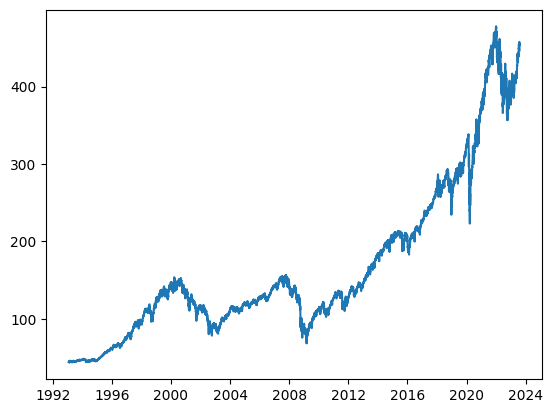

In [16]:
plt.plot(spy['Close'])
plt.show()

In [30]:
# split the data into training vs testing data sets
train_data = spy.iloc[:int(.99 *len(spy)), :]
test_data = spy.iloc[int(.99 *len(spy)):, :]

In [31]:
# define the features and target variable
features = ['Open','Volume']
target = ['Close']

In [32]:
# Create and train the model
model = xgb.XGBRegressor()
model.fit(train_data[features], train_data[target])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [92]:
# Make and show the predictions on the test data
print(test_data[features])
predictions = model.predict(test_data[features])
print('Model Predictions: ')
print(predictions)

                  Open     Volume
Date                             
2023-05-15  412.220001   54289400
2023-05-16  411.859985   57705500
2023-05-17  412.350006   87287000
2023-05-18  414.899994   97177200
2023-05-19  420.170013  103679700
2023-05-22  418.640015   60745400
2023-05-23  417.079987   86383500
2023-05-24  412.420013   89213700
2023-05-25  414.739990   90961600
2023-05-26  415.329987   93830000
2023-05-30  422.029999   72216000
2023-05-31  418.279999  110811800
2023-06-01  418.089996   88865000
2023-06-02  424.500000   91366700
2023-06-05  428.279999   65460200
2023-06-06  426.670013   64022200
2023-06-07  428.440002   85373300
2023-06-08  426.619995   61952800
2023-06-09  429.959991   85742800
2023-06-12  430.920013   76104300
2023-06-13  435.320007   95899700
2023-06-14  437.010010  100612100
2023-06-15  436.329987  110303100
2023-06-16  443.019989  114121300
2023-06-20  437.450012   76160400
2023-06-21  436.160004   76982300
2023-06-22  433.950012   70637200
2023-06-23  43

In [81]:
from matplotlib.text import Real
import numpy as np
# Show the actual target values
real_data = []
for i in test_data['Close']:
  real_data.append(i)
print("Actual Values: ", real_data)

Actual Values:  [413.010009765625, 410.25, 415.2300109863281, 419.2300109863281, 418.6199951171875, 418.7900085449219, 414.0899963378906, 411.0899963378906, 414.6499938964844, 420.0199890136719, 420.17999267578125, 417.8500061035156, 421.82000732421875, 427.9200134277344, 427.1000061035156, 428.0299987792969, 426.54998779296875, 429.1300048828125, 429.8999938964844, 433.79998779296875, 436.6600036621094, 437.17999267578125, 442.6000061035156, 439.4599914550781, 437.17999267578125, 434.94000244140625, 436.510009765625, 433.2099914550781, 431.44000244140625, 436.1700134277344, 436.3900146484375, 438.1099853515625, 443.2799987792969, 443.7900085449219, 443.1300048828125, 439.6600036621094, 438.54998779296875, 439.6600036621094, 442.4599914550781, 446.0199890136719, 449.55999755859375, 449.2799987792969, 450.8399963378906, 454.19000244140625, 455.20001220703125, 452.17999267578125, 452.17999267578125, 454.20001220703125, 455.44000244140625, 455.510009765625, 452.489990234375, 456.920013427

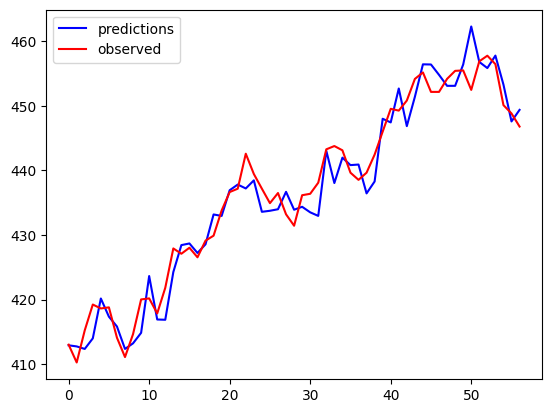

In [87]:
plt.plot(predictions, color='blue',label="predictions")
plt.plot(real_data,color='red',label="observed")
plt.legend()
plt.show()

In [88]:
# Show the models accuracy
accuracy = model.score(test_data[features], test_data[target])
print('Accuracy: ', accuracy)

Accuracy:  0.9522211848416294
